In [1]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Updating Q value

Q value might be updated in various different ways. One of the ways, that helps in non-stationary problems is to set weightning parameter $\alpha$ to a constant value. This results in exponentially smoothed average, where the value of past rewards fades exponentially comparing to the last reward.

In [2]:
def update_q(r, q, alpha):
    return q + alpha*(r - q)

In [39]:
rewards = [16]*10 + [22]*10 + [10] * 10
alphas = np.arange(.1, 1., .2).round(2)
qs = {}

init_q = 0

for alpha in tqdm(alphas):
    for t, r in enumerate(rewards):
        if t == 0:
            current_q = init_q
        current_q = update_q(r, current_q, alpha)
        qs[alpha] = qs.get(alpha, []) + [current_q]

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5515.92it/s]


In [40]:
qs_df = pd.DataFrame(qs)

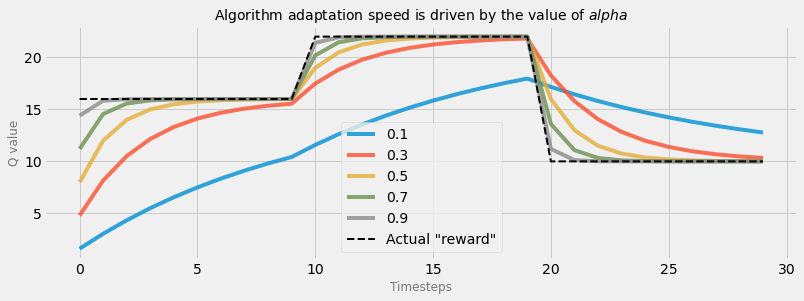

In [48]:
# Plot
plt.figure(figsize=(12, 4))

for c in qs_df.columns:
    plt.plot(qs_df[c], label=c, alpha=.8)

plt.plot(rewards, label='Actual "reward"', color='black', linestyle='--', linewidth=2)
plt.xlabel('Timesteps', fontsize=12, alpha=.5)
plt.ylabel('Q value', fontsize=12, alpha=.5)
plt.legend()
plt.title('Algorithm adaptation speed is driven by the value of $alpha$', fontsize=14)
plt.show()